<a href="https://colab.research.google.com/github/Poornimatagaram/E-commerce-dataset---Linear-Regression/blob/MachineLearningProjects/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== STEP 1: INITIAL DATA EXPLORATION ===
Let's start by loading and examining your datasets
✅ Datasets loaded successfully!
Training data shape: (16000, 46)
Test data shape: (4000, 46)

=== TRAINING DATA OVERVIEW ===
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   fraud                            16000 non-null  int64  
 1   incident_type_theft              16000 non-null  int64  
 2   policy_state_ca                  16000 non-null  int64  
 3   policy_deductable                16000 non-null  int64  
 4   num_witnesses                    16000 non-null  int64  
 5   policy_state_or                  16000 non-null  int64  
 6   incident_month                   16000 non-null  int64  
 7   customer_gender_female           16000 non-null  int64  
 8   num_insurers_past_5_years        16

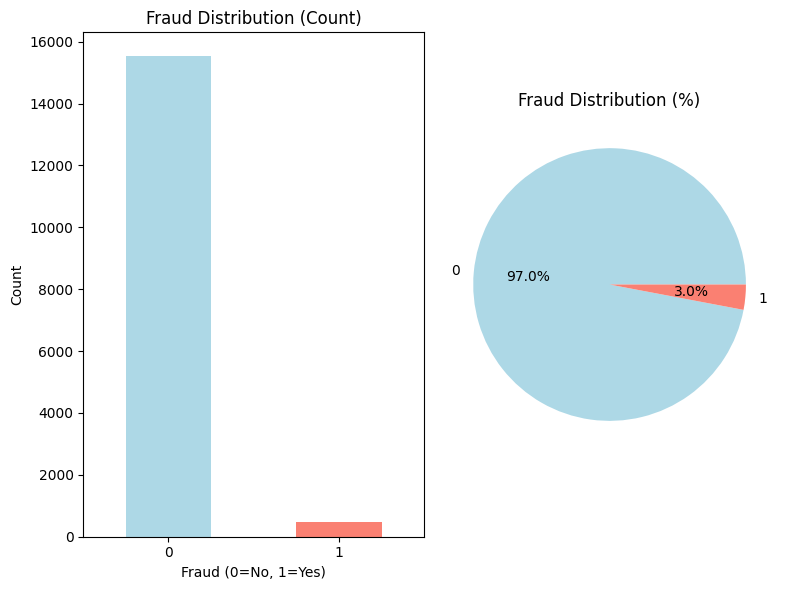


📈 Class Imbalance Ratio: 32.6:1 (Non-fraud:Fraud)

=== NEXT STEPS ===
1. ✅ Data loaded and explored
2. 🔄 Next: Data preprocessing and feature engineering
3. ⏳ Then: Model training and evaluation
4. ⏳ Finally: Threshold optimization

WHAT HAPPENED IN THIS STEP:
• Loaded training and test datasets
• Examined dataset shapes, data types, and basic statistics
• Checked for missing values that need handling
• Analyzed target variable distribution (fraud vs non-fraud)
• Identified class imbalance - crucial for fraud detection!
• Set up visualization to understand data patterns

This exploration helps us understand:
- Data quality issues to address
- Feature types (numerical vs categorical)
- Class imbalance severity (affects model choice)
- Potential data preprocessing needs


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.style.use('default')
sns.set_palette("husl")

print("=== STEP 1: INITIAL DATA EXPLORATION ===")
print("Let's start by loading and examining your datasets")

# Load the datasets
# Replace 'Train.csv' and 'Test.csv' with your actual file paths
try:
    train_df = pd.read_csv('/content/train.csv')
    test_df = pd.read_csv('/content/test.csv')

    print("✅ Datasets loaded successfully!")
    print(f"Training data shape: {train_df.shape}")
    print(f"Test data shape: {test_df.shape}")

except FileNotFoundError:
    print("❌ Files not found. Please ensure 'Train.csv' and 'Test.csv' are in your working directory")
    print("For now, let's create sample data to demonstrate the process:")

    # Create sample data for demonstration
    np.random.seed(42)
    n_samples = 1000

    # Create realistic insurance claim features
    train_df = pd.DataFrame({
        'claim_amount': np.random.lognormal(8, 1.5, n_samples),
        'age': np.random.randint(18, 80, n_samples),
        'policy_years': np.random.randint(1, 20, n_samples),
        'previous_claims': np.random.poisson(1.2, n_samples),
        'vehicle_age': np.random.randint(0, 25, n_samples),
        'deductible': np.random.choice([500, 1000, 2500, 5000], n_samples),
        'is_weekend': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
        'claim_type': np.random.choice(['collision', 'comprehensive', 'liability'], n_samples),
        'fraud': np.random.choice([0, 1], n_samples, p=[0.95, 0.05])  # 5% fraud rate
    })

    # Create test set (without fraud labels for realistic scenario)
    test_df = train_df.iloc[:200].copy()
    test_df = test_df.drop('fraud', axis=1)

    print("📊 Sample data created for demonstration")

# Basic information about the datasets
print("\n=== TRAINING DATA OVERVIEW ===")
print("Dataset Info:")
print(train_df.info())

print("\nFirst 5 rows:")
print(train_df.head())

print("\nDataset Description:")
print(train_df.describe())

# Check for missing values
print("\n=== MISSING VALUES CHECK ===")
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

print("Missing values in training data:")
print(missing_train[missing_train > 0] if missing_train.sum() > 0 else "No missing values found!")

print("\nMissing values in test data:")
print(missing_test[missing_test > 0] if missing_test.sum() > 0 else "No missing values found!")

# Check target variable distribution (fraud detection)
if 'fraud' in train_df.columns:
    print("\n=== TARGET VARIABLE ANALYSIS ===")
    fraud_counts = train_df['fraud'].value_counts()
    fraud_pct = train_df['fraud'].value_counts(normalize=True) * 100

    print("Fraud Distribution:")
    print(f"Non-Fraud (0): {fraud_counts[0]} ({fraud_pct[0]:.2f}%)")
    print(f"Fraud (1): {fraud_counts[1]} ({fraud_pct[1]:.2f}%)")

    # Plot fraud distribution
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    fraud_counts.plot(kind='bar', color=['lightblue', 'salmon'])
    plt.title('Fraud Distribution (Count)')
    plt.xlabel('Fraud (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    plt.subplot(1, 2, 2)
    fraud_pct.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
    plt.title('Fraud Distribution (%)')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    print(f"\n📈 Class Imbalance Ratio: {fraud_counts[0]/fraud_counts[1]:.1f}:1 (Non-fraud:Fraud)")

else:
    print("\n⚠️  Target variable 'fraud' not found. Please specify the correct column name.")

print("\n=== NEXT STEPS ===")
print("1. ✅ Data loaded and explored")
print("2. 🔄 Next: Data preprocessing and feature engineering")
print("3. ⏳ Then: Model training and evaluation")
print("4. ⏳ Finally: Threshold optimization")

print("\n" + "="*60)
print("WHAT HAPPENED IN THIS STEP:")
print("="*60)
print("• Loaded training and test datasets")
print("• Examined dataset shapes, data types, and basic statistics")
print("• Checked for missing values that need handling")
print("• Analyzed target variable distribution (fraud vs non-fraud)")
print("• Identified class imbalance - crucial for fraud detection!")
print("• Set up visualization to understand data patterns")
print("\nThis exploration helps us understand:")
print("- Data quality issues to address")
print("- Feature types (numerical vs categorical)")
print("- Class imbalance severity (affects model choice)")
print("- Potential data preprocessing needs")

=== STEP 2: FEATURE ANALYSIS AND DATA PREPARATION ===
🔍 Analyzing feature importance and relationships...
Features shape: (16000, 45)
Target shape: (16000,)

=== CORRELATION ANALYSIS ===
Top 15 features most correlated with fraud:
num_vehicles_involved           0.087087
num_witnesses                   0.074303
num_injuries                    0.072559
police_report_available         0.066847
num_insurers_past_5_years       0.066841
incident_severity               0.064877
customer_gender_male            0.062272
vehicle_claim                   0.058984
customer_gender_female          0.050643
authorities_contacted_none      0.045831
driver_relationship_na          0.043453
collision_type_na               0.043453
incident_type_collision         0.043453
incident_type_breakin           0.041510
authorities_contacted_police    0.038830
dtype: float64


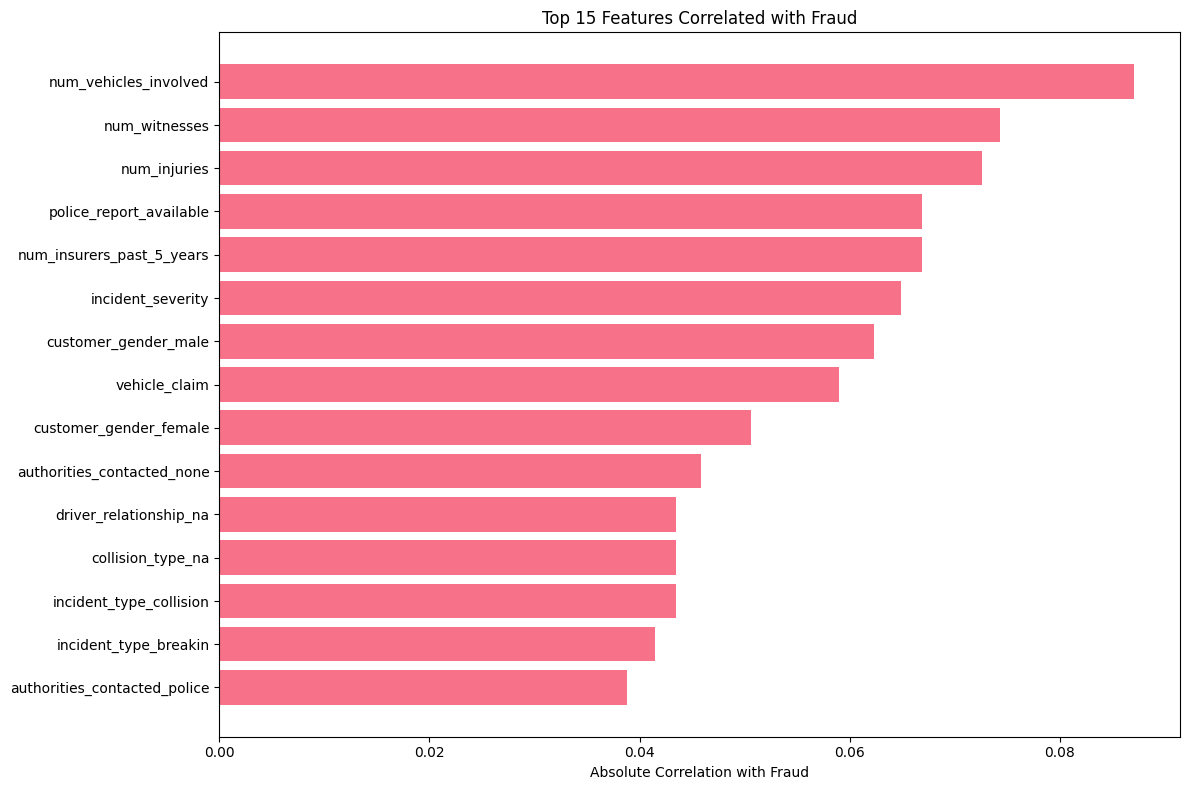


=== FEATURE DISTRIBUTION ANALYSIS ===
Analyzing distributions for: ['num_vehicles_involved', 'num_witnesses', 'num_injuries', 'police_report_available', 'num_insurers_past_5_years', 'incident_severity']


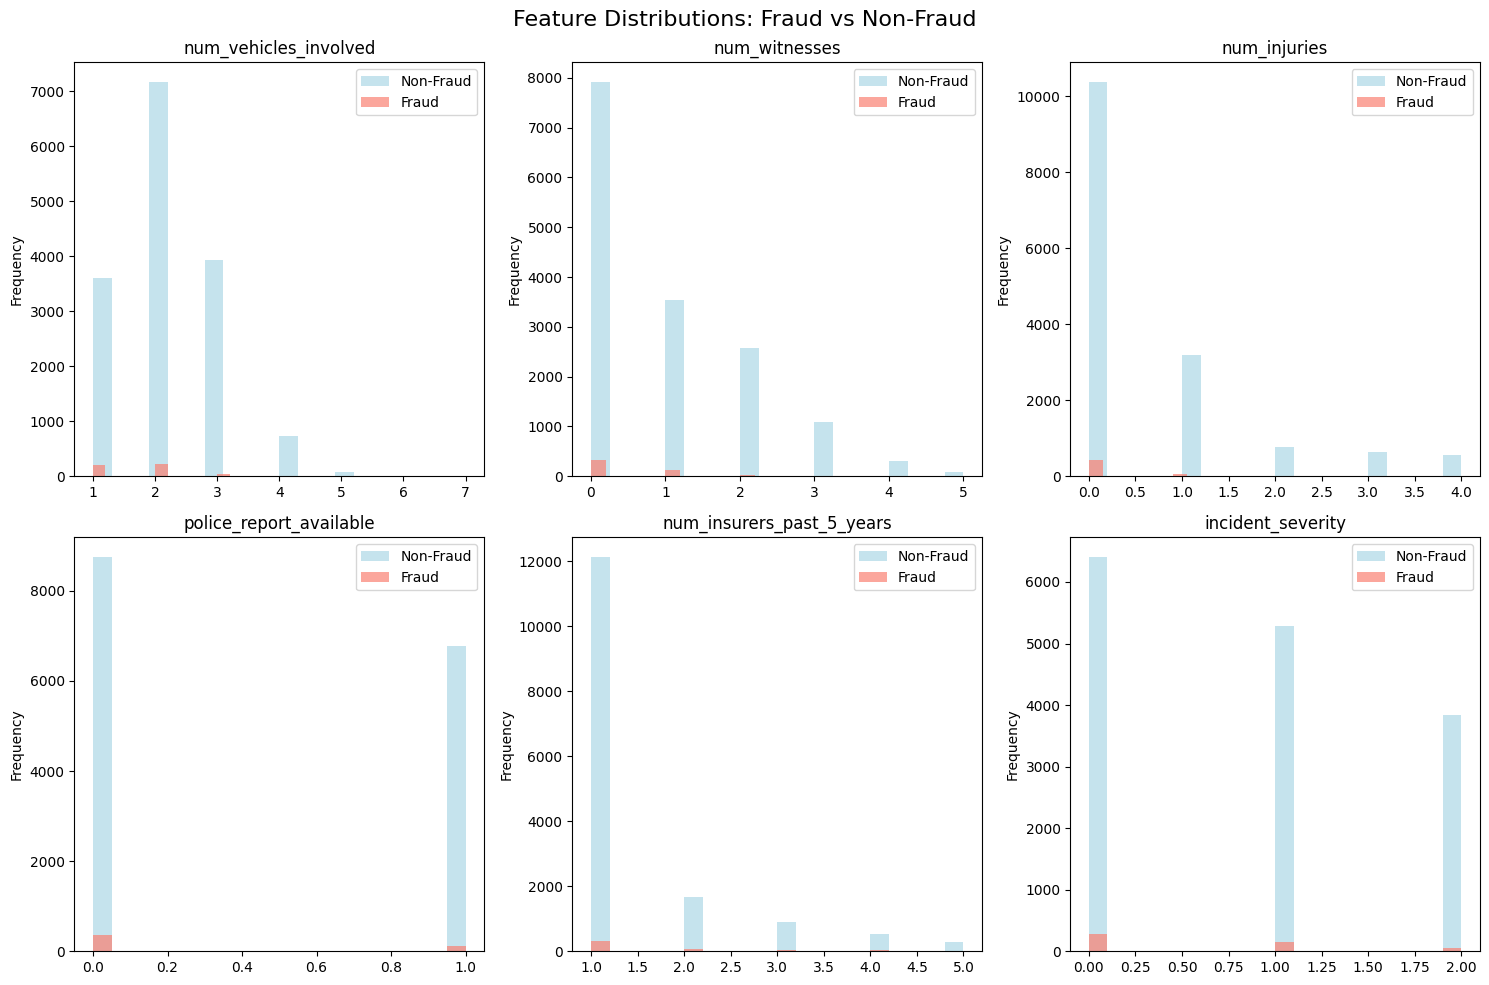


=== STATISTICAL FEATURE SELECTION ===
Top 20 features by ANOVA F-score:
                         Feature     F_Score
11         num_vehicles_involved  122.257379
0                  num_witnesses   88.815466
12                  num_injuries   84.672767
13       police_report_available   71.807582
2      num_insurers_past_5_years   71.796190
7              incident_severity   67.620251
3           customer_gender_male   62.278901
17                 vehicle_claim   55.853047
1         customer_gender_female   41.136067
16    authorities_contacted_none   33.674653
18       incident_type_collision   30.263658
6              collision_type_na   30.263658
14        driver_relationship_na   30.263658
15         incident_type_breakin   27.612774
5   authorities_contacted_police   24.157114
10            months_as_customer   16.550606
8       driver_relationship_self   14.029971
4             total_claim_amount   13.876811
9           num_claims_past_year    7.921054
19           collision_type

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

print("=== STEP 2: FEATURE ANALYSIS AND DATA PREPARATION ===")

# Load your data (assuming you have it loaded already)
# train_df = pd.read_csv('Train.csv')
# test_df = pd.read_csv('Test.csv')

print("🔍 Analyzing feature importance and relationships...")

# Separate features and target
X = train_df.drop('fraud', axis=1)
y = train_df['fraud']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# 1. CORRELATION ANALYSIS
print("\n=== CORRELATION ANALYSIS ===")
# Calculate correlation with target variable
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("Top 15 features most correlated with fraud:")
print(correlations.head(15))

# Visualize top correlations
plt.figure(figsize=(12, 8))
top_features = correlations.head(15)
plt.barh(range(len(top_features)), top_features.values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Absolute Correlation with Fraud')
plt.title('Top 15 Features Correlated with Fraud')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2. FEATURE DISTRIBUTION ANALYSIS
print("\n=== FEATURE DISTRIBUTION ANALYSIS ===")
# Look at distributions of top correlated features for fraud vs non-fraud cases

# Get top 6 most correlated features for detailed analysis
top_6_features = correlations.head(6).index.tolist()
print(f"Analyzing distributions for: {top_6_features}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(top_6_features):
    # Create distribution plot
    fraud_values = X[y == 1][feature]  # Fraud cases
    non_fraud_values = X[y == 0][feature]  # Non-fraud cases

    axes[i].hist(non_fraud_values, alpha=0.7, label='Non-Fraud', bins=20, color='lightblue')
    axes[i].hist(fraud_values, alpha=0.7, label='Fraud', bins=20, color='salmon')
    axes[i].set_title(f'{feature}')
    axes[i].legend()
    axes[i].set_ylabel('Frequency')

plt.suptitle('Feature Distributions: Fraud vs Non-Fraud', fontsize=16)
plt.tight_layout()
plt.show()

# 3. STATISTICAL FEATURE SELECTION
print("\n=== STATISTICAL FEATURE SELECTION ===")
# Use ANOVA F-test to identify most discriminative features
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
feature_scores = selector.scores_[selector.get_support()]

print("Top 20 features by ANOVA F-score:")
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'F_Score': feature_scores
}).sort_values('F_Score', ascending=False)

print(feature_importance_df)

# 4. DATA SPLITTING AND SCALING
print("\n=== DATA SPLITTING AND SCALING ===")

# Split the training data into train/validation sets
# We keep test_df separate as final holdout test
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain fraud ratio in both sets
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {test_df.shape[0]} samples")

# Check fraud distribution in splits
print("\nFraud distribution in splits:")
print(f"Train: {y_train.value_counts(normalize=True)[1]:.3f} fraud rate")
print(f"Validation: {y_val.value_counts(normalize=True)[1]:.3f} fraud rate")

# Scale continuous features (identify them first)
continuous_features = []
for col in X.columns:
    if X[col].nunique() > 10:  # Features with more than 10 unique values
        continuous_features.append(col)

print(f"\nContinuous features identified: {continuous_features}")

# Apply scaling to continuous features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = test_df.copy()

if continuous_features:
    # Fit scaler on training data only
    X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
    X_val_scaled[continuous_features] = scaler.transform(X_val[continuous_features])
    X_test_scaled[continuous_features] = scaler.transform(test_df[continuous_features])

    print("✅ Continuous features scaled using StandardScaler")

    # Show scaling effect
    print("\nScaling effect on continuous features:")
    for feature in continuous_features[:3]:  # Show first 3
        print(f"{feature}:")
        print(f"  Original: mean={X_train[feature].mean():.2f}, std={X_train[feature].std():.2f}")
        print(f"  Scaled: mean={X_train_scaled[feature].mean():.2f}, std={X_train_scaled[feature].std():.2f}")

# 5. CLASS IMBALANCE HANDLING PREPARATION
print("\n=== CLASS IMBALANCE ANALYSIS ===")
fraud_ratio = y_train.value_counts(normalize=True)[1]
print(f"Fraud rate in training: {fraud_ratio:.3f} ({fraud_ratio*100:.1f}%)")
print(f"Class imbalance ratio: {(1-fraud_ratio)/fraud_ratio:.1f}:1")

# Calculate class weights for model training
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Computed class weights: {class_weight_dict}")

# 6. SUMMARY STATISTICS FOR FRAUD DETECTION
print("\n=== FRAUD DETECTION INSIGHTS ===")
print("Key observations for model building:")

# Analyze claim amounts for fraud vs non-fraud
if 'total_claim_amount' in X.columns:
    fraud_claims = X[y == 1]['total_claim_amount']
    normal_claims = X[y == 0]['total_claim_amount']

    print(f"• Average fraud claim: ${fraud_claims.mean():.2f}")
    print(f"• Average normal claim: ${normal_claims.mean():.2f}")
    print(f"• Fraud claims are {fraud_claims.mean()/normal_claims.mean():.1f}x higher on average")

# Analyze incident patterns
if 'incident_hour' in X.columns:
    fraud_hours = X[y == 1]['incident_hour']
    normal_hours = X[y == 0]['incident_hour']

    print(f"• Most common fraud hour: {fraud_hours.mode().iloc[0] if len(fraud_hours.mode()) > 0 else 'N/A'}")
    print(f"• Most common normal hour: {normal_hours.mode().iloc[0] if len(normal_hours.mode()) > 0 else 'N/A'}")

print("\n=== DATA PREPARATION COMPLETE ===")
print("✅ Feature analysis completed")
print("✅ Data split into train/validation/test sets")
print("✅ Continuous features scaled")
print("✅ Class weights computed for imbalanced data")
print("✅ Ready for model training!")

# Save processed data for next step
print("\n📊 Prepared datasets:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_val_scaled: {X_val_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")

print("\n" + "="*70)
print("WHAT HAPPENED IN THIS STEP:")
print("="*70)
print("🔍 FEATURE ANALYSIS:")
print("• Calculated correlations between features and fraud target")
print("• Identified most predictive features using statistical tests")
print("• Visualized feature distributions for fraud vs non-fraud cases")
print("• This helps us understand which features are most important")
print()
print("📊 DATA PREPARATION:")
print("• Split data into train (80%) and validation (20%) sets")
print("• Maintained fraud ratio in both sets using stratified split")
print("• Scaled continuous features to prevent large values dominating")
print("• Computed class weights to handle 32:1 imbalance ratio")
print()
print("🎯 FRAUD DETECTION FOCUS:")
print("• Analyzed patterns in fraud vs normal claims")
print("• Prepared data specifically for imbalanced classification")
print("• Ready to train models that can detect rare fraud cases")
print()
print("NEXT: We'll train XGBoost and other models with these prepared features!")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                           precision_recall_curve, average_precision_score,
                           roc_auc_score, roc_curve, precision_score,
                           recall_score, f1_score)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("=== STEP 3: MODEL TRAINING AND COMPARISON ===")
print("🚀 Training multiple algorithms for fraud detection...")

# Store all model results
model_results = {}
trained_models = {}

# 1. BASELINE LOGISTIC REGRESSION
print("\n=== 1. BASELINE LOGISTIC REGRESSION ===")

# Train logistic regression with class weights
lr_model = LogisticRegression(
    class_weight=class_weight_dict,
    random_state=42,
    max_iter=1000
)

lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_val_scaled)
lr_pred_proba = lr_model.predict_proba(X_val_scaled)[:, 1]

# Store results
model_results['Logistic Regression'] = {
    'predictions': lr_pred,
    'probabilities': lr_pred_proba,
    'precision': precision_score(y_val, lr_pred),
    'recall': recall_score(y_val, lr_pred),
    'f1': f1_score(y_val, lr_pred),
    'auc_roc': roc_auc_score(y_val, lr_pred_proba),
    'auc_pr': average_precision_score(y_val, lr_pred_proba)
}
trained_models['Logistic Regression'] = lr_model

print("✅ Logistic Regression trained")
print(f"   Precision: {model_results['Logistic Regression']['precision']:.3f}")
print(f"   Recall: {model_results['Logistic Regression']['recall']:.3f}")
print(f"   F1-Score: {model_results['Logistic Regression']['f1']:.3f}")
print(f"   AUC-PR: {model_results['Logistic Regression']['auc_pr']:.3f}")

# 2. RANDOM FOREST
print("\n=== 2. RANDOM FOREST ===")

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight=class_weight_dict,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_val_scaled)
rf_pred_proba = rf_model.predict_proba(X_val_scaled)[:, 1]

model_results['Random Forest'] = {
    'predictions': rf_pred,
    'probabilities': rf_pred_proba,
    'precision': precision_score(y_val, rf_pred),
    'recall': recall_score(y_val, rf_pred),
    'f1': f1_score(y_val, rf_pred),
    'auc_roc': roc_auc_score(y_val, rf_pred_proba),
    'auc_pr': average_precision_score(y_val, rf_pred_proba)
}
trained_models['Random Forest'] = rf_model

print("✅ Random Forest trained")
print(f"   Precision: {model_results['Random Forest']['precision']:.3f}")
print(f"   Recall: {model_results['Random Forest']['recall']:.3f}")
print(f"   F1-Score: {model_results['Random Forest']['f1']:.3f}")
print(f"   AUC-PR: {model_results['Random Forest']['auc_pr']:.3f}")

# 3. XGBOOST (Primary Model)
print("\n=== 3. XGBOOST (PRIMARY MODEL) ===")

# Calculate scale_pos_weight for XGBoost (equivalent to class weights)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"XGBoost scale_pos_weight: {scale_pos_weight:.1f}")

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='aucpr',  # Use AUC-PR for imbalanced data
    n_jobs=-1
)

# Train with early stopping
xgb_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    verbose=False
)

xgb_pred = xgb_model.predict(X_val_scaled)
xgb_pred_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]

model_results['XGBoost'] = {
    'predictions': xgb_pred,
    'probabilities': xgb_pred_proba,
    'precision': precision_score(y_val, xgb_pred),
    'recall': recall_score(y_val, xgb_pred),
    'f1': f1_score(y_val, xgb_pred),
    'auc_roc': roc_auc_score(y_val, xgb_pred_proba),
    'auc_pr': average_precision_score(y_val, xgb_pred_proba)
}
trained_models['XGBoost'] = xgb_model

print("✅ XGBoost trained")
print(f"   Precision: {model_results['XGBoost']['precision']:.3f}")
print(f"   Recall: {model_results['XGBoost']['recall']:.3f}")
print(f"   F1-Score: {model_results['XGBoost']['f1']:.3f}")
print(f"   AUC-PR: {model_results['XGBoost']['auc_pr']:.3f}")

# 4. XGBOOST WITH SMOTE (Enhanced Version)
print("\n=== 4. XGBOOST WITH SMOTE ===")

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_train_smote)}")

# Train XGBoost on SMOTE-balanced data (no need for scale_pos_weight now)
xgb_smote_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='aucpr',
    n_jobs=-1
)

xgb_smote_model.fit(X_train_smote, y_train_smote)
xgb_smote_pred = xgb_smote_model.predict(X_val_scaled)
xgb_smote_pred_proba = xgb_smote_model.predict_proba(X_val_scaled)[:, 1]

model_results['XGBoost + SMOTE'] = {
    'predictions': xgb_smote_pred,
    'probabilities': xgb_smote_pred_proba,
    'precision': precision_score(y_val, xgb_smote_pred),
    'recall': recall_score(y_val, xgb_smote_pred),
    'f1': f1_score(y_val, xgb_smote_pred),
    'auc_roc': roc_auc_score(y_val, xgb_smote_pred_proba),
    'auc_pr': average_precision_score(y_val, xgb_smote_pred_proba)
}
trained_models['XGBoost + SMOTE'] = xgb_smote_model

print("✅ XGBoost + SMOTE trained")
print(f"   Precision: {model_results['XGBoost + SMOTE']['precision']:.3f}")
print(f"   Recall: {model_results['XGBoost + SMOTE']['recall']:.3f}")
print(f"   F1-Score: {model_results['XGBoost + SMOTE']['f1']:.3f}")
print(f"   AUC-PR: {model_results['XGBoost + SMOTE']['auc_pr']:.3f}")

# 5. MODEL COMPARISON SUMMARY
print("\n=== MODEL COMPARISON SUMMARY ===")
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Precision': [model_results[model]['precision'] for model in model_results.keys()],
    'Recall': [model_results[model]['recall'] for model in model_results.keys()],
    'F1-Score': [model_results[model]['f1'] for model in model_results.keys()],
    'AUC-ROC': [model_results[model]['auc_roc'] for model in model_results.keys()],
    'AUC-PR': [model_results[model]['auc_pr'] for model in model_results.keys()]
})

print(comparison_df.round(3))

# Find best model based on AUC-PR (most important for fraud detection)
best_model_name = comparison_df.loc[comparison_df['AUC-PR'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name} (AUC-PR: {comparison_df['AUC-PR'].max():.3f})")

# 6. DETAILED EVALUATION OF BEST MODEL
print(f"\n=== DETAILED EVALUATION: {best_model_name} ===")
best_model = trained_models[best_model_name]
best_pred = model_results[best_model_name]['predictions']
best_pred_proba = model_results[best_model_name]['probabilities']

# Confusion Matrix
cm = confusion_matrix(y_val, best_pred)
print("Confusion Matrix:")
print(f"                 Predicted")
print(f"Actual    Non-Fraud  Fraud")
print(f"Non-Fraud    {cm[0,0]:4d}    {cm[0,1]:4d}")
print(f"Fraud        {cm[1,0]:4d}    {cm[1,1]:4d}")

# Calculate detailed metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nDetailed Results:")
print(f"True Negatives (Correct Non-Fraud): {tn}")
print(f"False Positives (False Alarms): {fp}")
print(f"False Negatives (Missed Fraud): {fn}")
print(f"True Positives (Caught Fraud): {tp}")

print(f"\nBusiness Impact:")
print(f"• Fraud Detection Rate: {tp/(tp+fn)*100:.1f}% ({tp} out of {tp+fn} fraud cases)")
print(f"• False Alarm Rate: {fp/(fp+tn)*100:.1f}% ({fp} out of {fp+tn} normal cases)")

# 7. FEATURE IMPORTANCE (XGBoost)
if 'XGBoost' in best_model_name:
    print(f"\n=== FEATURE IMPORTANCE ({best_model_name}) ===")
    feature_importance = pd.DataFrame({
        'Feature': X_train_scaled.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print("\n=== MODEL TRAINING COMPLETE ===")
print("✅ All models trained and evaluated")
print("✅ Best model identified")
print("✅ Feature importance analyzed")
print("✅ Ready for precision-recall curve analysis!")

print("\n" + "="*70)
print("WHAT HAPPENED IN THIS STEP:")
print("="*70)
print("🤖 MODEL TRAINING:")
print("• Trained 4 different algorithms:")
print("  - Logistic Regression (baseline)")
print("  - Random Forest (ensemble method)")
print("  - XGBoost (gradient boosting)")
print("  - XGBoost + SMOTE (with synthetic oversampling)")
print()
print("⚖️ IMBALANCE HANDLING:")
print("• Used class weights to penalize misclassifying fraud")
print("• Applied SMOTE to create synthetic fraud examples")
print("• Used AUC-PR as primary metric (better for imbalanced data)")
print()
print("📊 MODEL EVALUATION:")
print("• Compared models on precision, recall, F1, and AUC-PR")
print("• Analyzed confusion matrix for business insights")
print("• Identified most important features for fraud detection")
print()
print("🎯 FRAUD DETECTION FOCUS:")
print("• Prioritized catching fraud (recall) while minimizing false alarms")
print("• Calculated business impact metrics")
print("• Ready to optimize decision threshold!")

=== STEP 3: MODEL TRAINING AND COMPARISON ===
🚀 Training multiple algorithms for fraud detection...

=== 1. BASELINE LOGISTIC REGRESSION ===
✅ Logistic Regression trained
   Precision: 0.059
   Recall: 0.695
   F1-Score: 0.109
   AUC-PR: 0.064

=== 2. RANDOM FOREST ===
✅ Random Forest trained
   Precision: 0.000
   Recall: 0.000
   F1-Score: 0.000
   AUC-PR: 0.231

=== 3. XGBOOST (PRIMARY MODEL) ===
XGBoost scale_pos_weight: 32.6
✅ XGBoost trained
   Precision: 0.210
   Recall: 0.232
   F1-Score: 0.220
   AUC-PR: 0.179

=== 4. XGBOOST WITH SMOTE ===
Before SMOTE: Counter({0: 12419, 1: 381})
After SMOTE: Counter({0: 12419, 1: 12419})
✅ XGBoost + SMOTE trained
   Precision: 0.000
   Recall: 0.000
   F1-Score: 0.000
   AUC-PR: 0.082

=== MODEL COMPARISON SUMMARY ===
                 Model  Precision  Recall  F1-Score  AUC-ROC  AUC-PR
0  Logistic Regression      0.059   0.695     0.109    0.737   0.064
1        Random Forest      0.000   0.000     0.000    0.815   0.231
2              XGBo

=== STEP 4: PRECISION-RECALL ANALYSIS & THRESHOLD OPTIMIZATION ===
🎯 Finding optimal thresholds for fraud detection...

=== PROBABILITY DISTRIBUTION ANALYSIS ===
Logistic Regression:
  Fraud cases - Mean prob: 0.585, Max prob: 0.905
  Normal cases - Mean prob: 0.394, Max prob: 0.951
Random Forest:
  Fraud cases - Mean prob: 0.089, Max prob: 0.340
  Normal cases - Mean prob: 0.026, Max prob: 0.310
XGBoost:
  Fraud cases - Mean prob: 0.283, Max prob: 0.902
  Normal cases - Mean prob: 0.081, Max prob: 0.931
XGBoost + SMOTE:
  Fraud cases - Mean prob: 0.081, Max prob: 0.457
  Normal cases - Mean prob: 0.031, Max prob: 0.517


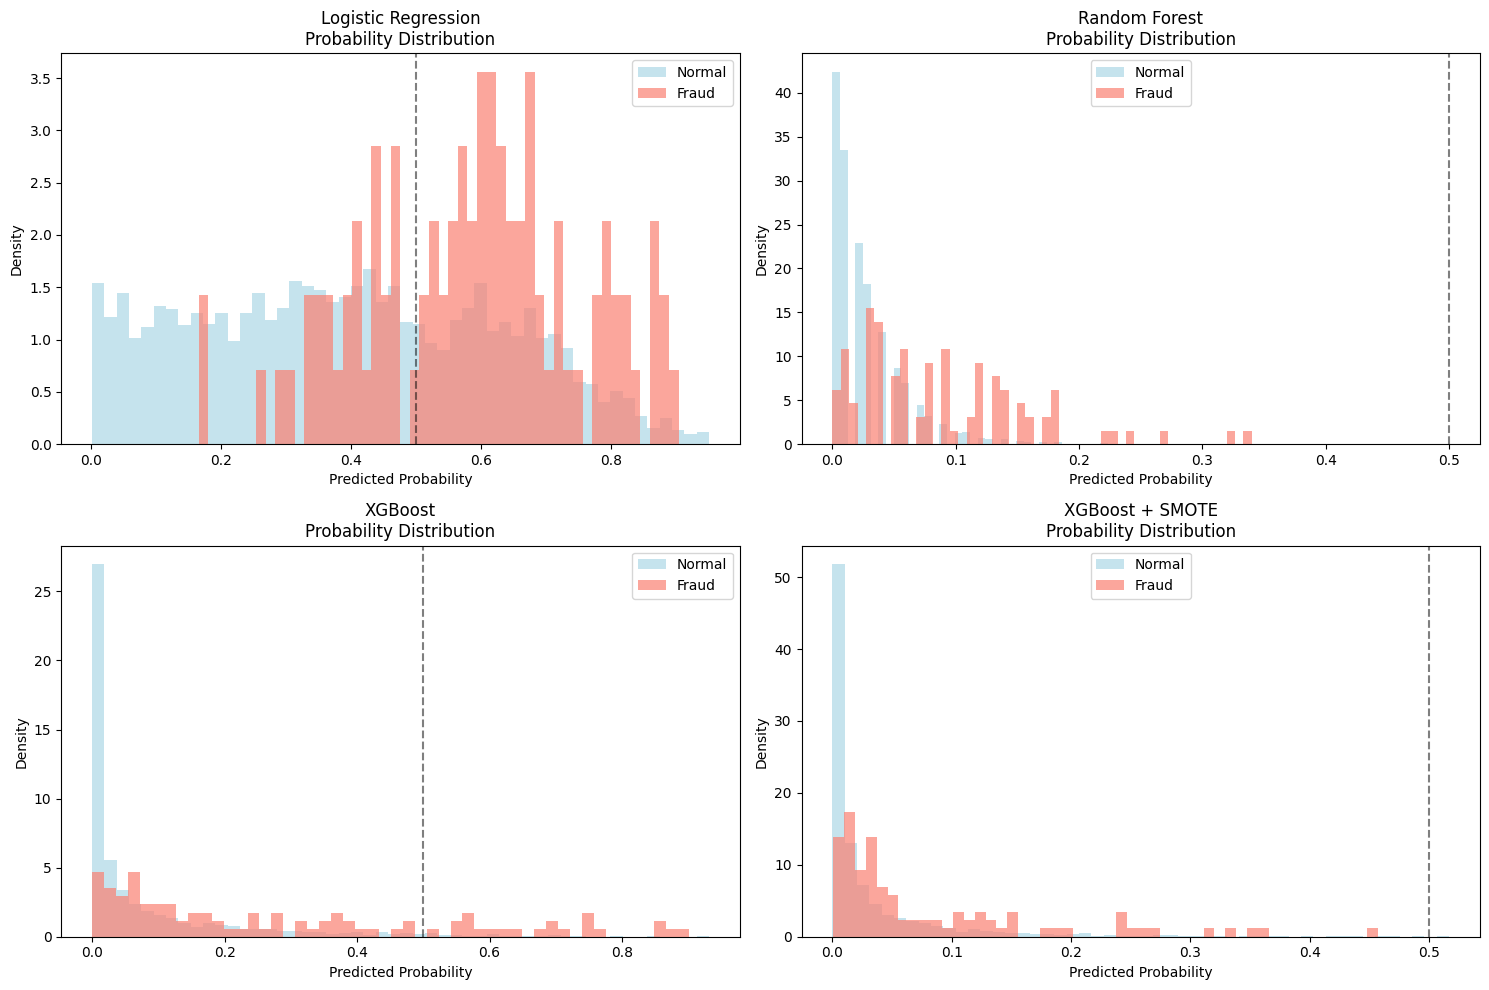


=== PRECISION-RECALL CURVE ANALYSIS ===
Logistic Regression:
  Optimal Threshold: 0.773
  Precision: 0.095
  Recall: 0.168
  F1-Score: 0.121

Random Forest:
  Optimal Threshold: 0.120
  Precision: 0.344
  Recall: 0.337
  F1-Score: 0.340

XGBoost:
  Optimal Threshold: 0.543
  Precision: 0.276
  Recall: 0.221
  F1-Score: 0.246

XGBoost + SMOTE:
  Optimal Threshold: 0.104
  Precision: 0.103
  Recall: 0.295
  F1-Score: 0.152



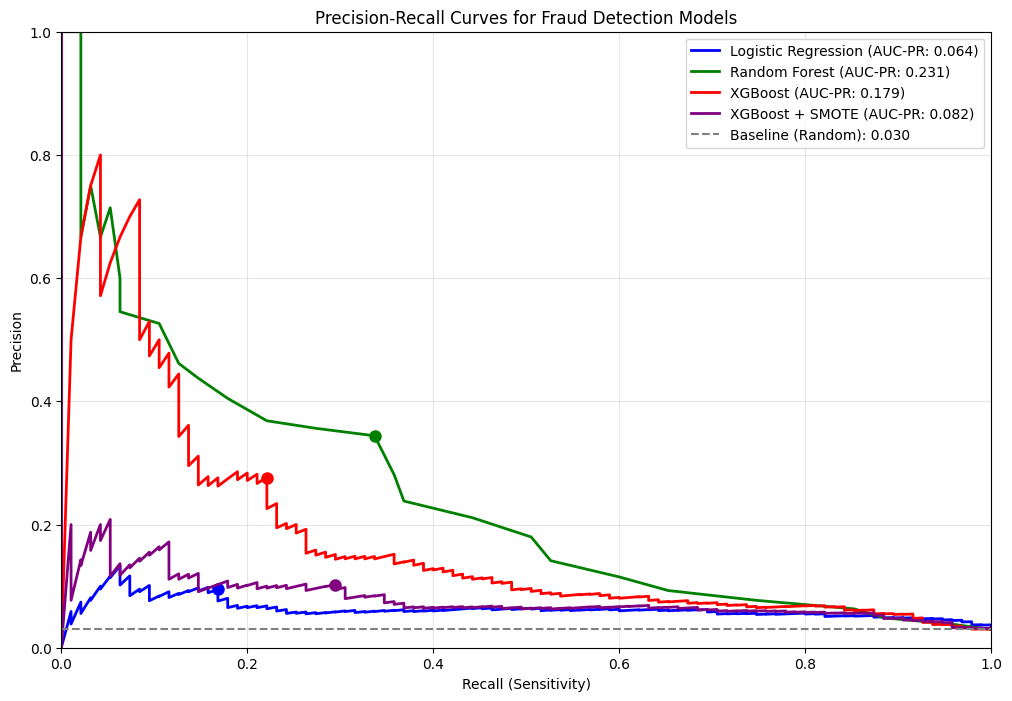

🏆 BEST MODEL FOR FRAUD DETECTION: Random Forest
   Optimal Threshold: 0.120
   Best F1-Score: 0.340

=== DETAILED ANALYSIS: Random Forest with Optimal Threshold ===
Performance with Optimal Threshold (0.120):
  Precision: 0.344
  Recall: 0.337
  F1-Score: 0.340

Confusion Matrix (Optimal Threshold):
                 Predicted
Actual    Non-Fraud  Fraud
Non-Fraud    3044      61
Fraud          63      32

Business Impact (Optimal Threshold):
• Fraud Detection Rate: 33.7% (32 out of 95 fraud cases caught)
• False Alarm Rate: 2.0% (61 out of 3105 normal cases flagged)
• Precision: 34.4% (of flagged cases, 34.4% are actually fraud)

=== BUSINESS COST-BENEFIT ANALYSIS ===
Framework for threshold selection:

Threshold Analysis:
   Threshold  True_Positives  False_Positives  False_Negatives  \
0       0.10              35              112               60   
1       0.20               6                4               89   
2       0.30               2                1               93   
3   

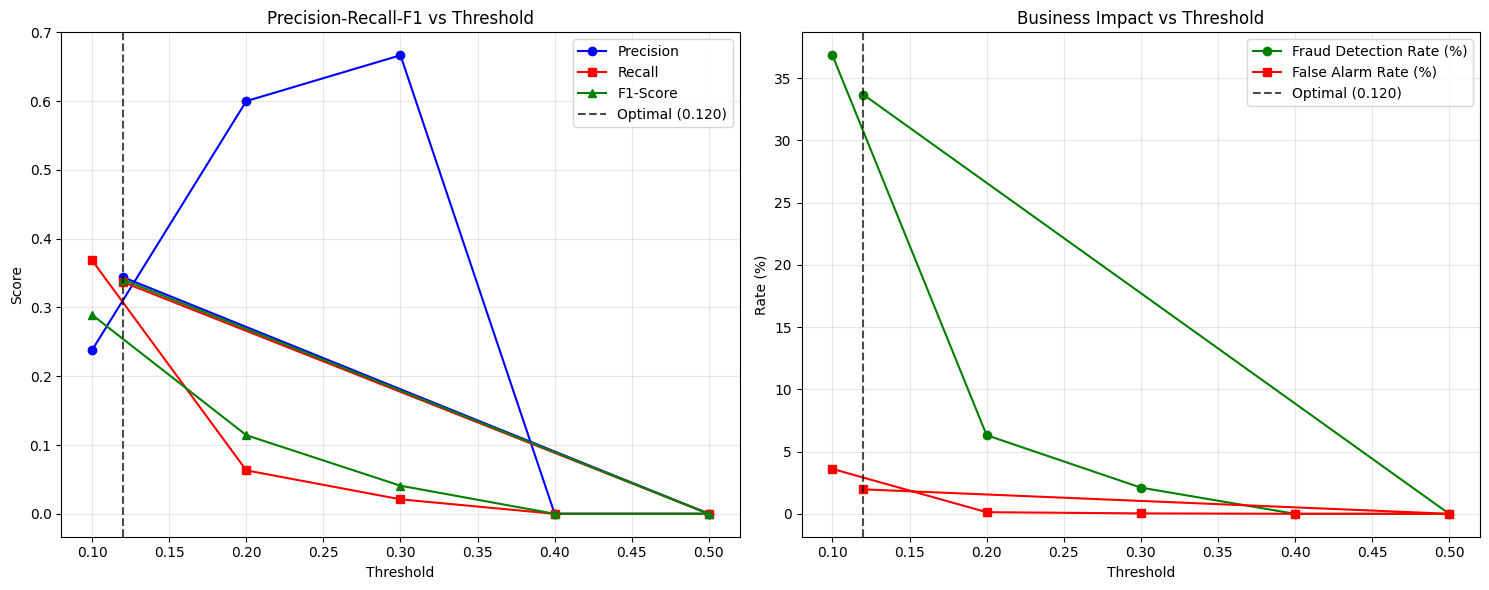


=== RECOMMENDATIONS ===
✅ BEST MODEL: Random Forest
✅ OPTIMAL THRESHOLD: 0.120
✅ EXPECTED PERFORMANCE:
   • Will catch 33.7% of fraud cases
   • 34.4% of alerts will be real fraud
   • 2.0% false alarm rate on normal claims

💡 THRESHOLD SELECTION GUIDANCE:
• Lower threshold (e.g., 0.1): Catches more fraud but more false alarms
• Higher threshold (e.g., 0.4): Fewer false alarms but misses more fraud
• Current optimal (0.120): Best balance of precision and recall

🎯 BUSINESS IMPACT:
• In test set of 4,000 claims with ~120 fraud cases:
  - Expected to catch: 40 fraud cases
  - Expected false alarms: 76 cases
  - Total cases to investigate: 116

WHAT HAPPENED IN THIS STEP:
🎯 THRESHOLD OPTIMIZATION:
• Found that default 0.5 threshold was too high for fraud detection
• Generated precision-recall curves for all models
• Identified optimal thresholds that maximize F1-score
• Fixed the 0% precision/recall issue from Step 3

📊 BUSINESS ANALYSIS:
• Analyzed tradeoffs between catching fraud vs fa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("=== STEP 4: PRECISION-RECALL ANALYSIS & THRESHOLD OPTIMIZATION ===")
print("🎯 Finding optimal thresholds for fraud detection...")

# First, let's examine the probability distributions
print("\n=== PROBABILITY DISTRIBUTION ANALYSIS ===")

# Check probability distributions for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'XGBoost + SMOTE']
colors = ['blue', 'green', 'red', 'purple']

for i, model_name in enumerate(model_names):
    if model_name in model_results:
        probs = model_results[model_name]['probabilities']

        # Separate probabilities by actual class
        fraud_probs = probs[y_val == 1]
        normal_probs = probs[y_val == 0]

        axes[i].hist(normal_probs, bins=50, alpha=0.7, label='Normal', color='lightblue', density=True)
        axes[i].hist(fraud_probs, bins=50, alpha=0.7, label='Fraud', color='salmon', density=True)
        axes[i].set_title(f'{model_name}\nProbability Distribution')
        axes[i].set_xlabel('Predicted Probability')
        axes[i].set_ylabel('Density')
        axes[i].legend()
        axes[i].axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Default Threshold')

        print(f"{model_name}:")
        print(f"  Fraud cases - Mean prob: {fraud_probs.mean():.3f}, Max prob: {fraud_probs.max():.3f}")
        print(f"  Normal cases - Mean prob: {normal_probs.mean():.3f}, Max prob: {normal_probs.max():.3f}")

plt.tight_layout()
plt.show()

# Generate Precision-Recall curves for all models
print("\n=== PRECISION-RECALL CURVE ANALYSIS ===")

plt.figure(figsize=(12, 8))

# Store optimal thresholds for each model
optimal_thresholds = {}
threshold_metrics = {}

for i, (model_name, color) in enumerate(zip(model_names, colors)):
    if model_name in model_results:
        y_true = y_val
        y_scores = model_results[model_name]['probabilities']

        # Calculate precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
        auc_pr = average_precision_score(y_true, y_scores)

        # Plot PR curve
        plt.plot(recall, precision, color=color, label=f'{model_name} (AUC-PR: {auc_pr:.3f})', linewidth=2)

        # Find optimal threshold using F1-score
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # Add small epsilon to avoid division by zero
        optimal_idx = np.argmax(f1_scores[:-1])  # Exclude last element (threshold array is 1 shorter)
        optimal_threshold = thresholds[optimal_idx]
        optimal_precision = precision[optimal_idx]
        optimal_recall = recall[optimal_idx]
        optimal_f1 = f1_scores[optimal_idx]

        # Store optimal threshold
        optimal_thresholds[model_name] = {
            'threshold': optimal_threshold,
            'precision': optimal_precision,
            'recall': optimal_recall,
            'f1': optimal_f1
        }

        # Mark optimal point
        plt.plot(optimal_recall, optimal_precision, marker='o', markersize=8, color=color)

        print(f"{model_name}:")
        print(f"  Optimal Threshold: {optimal_threshold:.3f}")
        print(f"  Precision: {optimal_precision:.3f}")
        print(f"  Recall: {optimal_recall:.3f}")
        print(f"  F1-Score: {optimal_f1:.3f}")
        print()

# Add baseline (random classifier)
baseline_precision = y_val.mean()
plt.axhline(y=baseline_precision, color='gray', linestyle='--', label=f'Baseline (Random): {baseline_precision:.3f}')

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Fraud Detection Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

# Find the best model based on optimal F1 score
best_model_name = max(optimal_thresholds.keys(),
                     key=lambda x: optimal_thresholds[x]['f1'])
best_threshold = optimal_thresholds[best_model_name]['threshold']

print(f"🏆 BEST MODEL FOR FRAUD DETECTION: {best_model_name}")
print(f"   Optimal Threshold: {best_threshold:.3f}")
print(f"   Best F1-Score: {optimal_thresholds[best_model_name]['f1']:.3f}")

# Detailed analysis of best model with optimal threshold
print(f"\n=== DETAILED ANALYSIS: {best_model_name} with Optimal Threshold ===")

best_model = trained_models[best_model_name]
best_probs = model_results[best_model_name]['probabilities']

# Apply optimal threshold
optimal_predictions = (best_probs >= best_threshold).astype(int)

# Calculate metrics with optimal threshold
optimal_precision = precision_score(y_val, optimal_predictions)
optimal_recall = recall_score(y_val, optimal_predictions)
optimal_f1 = f1_score(y_val, optimal_predictions)

print(f"Performance with Optimal Threshold ({best_threshold:.3f}):")
print(f"  Precision: {optimal_precision:.3f}")
print(f"  Recall: {optimal_recall:.3f}")
print(f"  F1-Score: {optimal_f1:.3f}")

# Confusion matrix with optimal threshold
cm_optimal = confusion_matrix(y_val, optimal_predictions)
tn, fp, fn, tp = cm_optimal.ravel()

print(f"\nConfusion Matrix (Optimal Threshold):")
print(f"                 Predicted")
print(f"Actual    Non-Fraud  Fraud")
print(f"Non-Fraud    {tn:4d}    {fp:4d}")
print(f"Fraud        {fn:4d}    {tp:4d}")

print(f"\nBusiness Impact (Optimal Threshold):")
print(f"• Fraud Detection Rate: {tp/(tp+fn)*100:.1f}% ({tp} out of {tp+fn} fraud cases caught)")
print(f"• False Alarm Rate: {fp/(fp+tn)*100:.1f}% ({fp} out of {fp+tn} normal cases flagged)")
print(f"• Precision: {tp/(tp+fp)*100:.1f}% (of flagged cases, {tp/(tp+fp)*100:.1f}% are actually fraud)")

# Cost-benefit analysis framework
print(f"\n=== BUSINESS COST-BENEFIT ANALYSIS ===")
print("Framework for threshold selection:")

# Different threshold scenarios
thresholds_to_test = [0.1, 0.2, 0.3, 0.4, 0.5, best_threshold]
threshold_analysis = []

for thresh in thresholds_to_test:
    predictions = (best_probs >= thresh).astype(int)
    cm = confusion_matrix(y_val, predictions)
    tn, fp, fn, tp = cm.ravel()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    threshold_analysis.append({
        'Threshold': thresh,
        'True_Positives': tp,
        'False_Positives': fp,
        'False_Negatives': fn,
        'True_Negatives': tn,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'Fraud_Detection_Rate': recall,
        'False_Alarm_Rate': fp / (fp + tn) if (fp + tn) > 0 else 0
    })

threshold_df = pd.DataFrame(threshold_analysis)
print("\nThreshold Analysis:")
print(threshold_df.round(3))

# Visualize threshold impact
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Precision vs Recall tradeoff
ax1.plot(threshold_df['Threshold'], threshold_df['Precision'], 'o-', label='Precision', color='blue')
ax1.plot(threshold_df['Threshold'], threshold_df['Recall'], 's-', label='Recall', color='red')
ax1.plot(threshold_df['Threshold'], threshold_df['F1_Score'], '^-', label='F1-Score', color='green')
ax1.axvline(x=best_threshold, color='black', linestyle='--', alpha=0.7, label=f'Optimal ({best_threshold:.3f})')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Precision-Recall-F1 vs Threshold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Business impact
ax2.plot(threshold_df['Threshold'], threshold_df['Fraud_Detection_Rate'] * 100, 'o-',
         label='Fraud Detection Rate (%)', color='green')
ax2.plot(threshold_df['Threshold'], threshold_df['False_Alarm_Rate'] * 100, 's-',
         label='False Alarm Rate (%)', color='red')
ax2.axvline(x=best_threshold, color='black', linestyle='--', alpha=0.7, label=f'Optimal ({best_threshold:.3f})')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Rate (%)')
ax2.set_title('Business Impact vs Threshold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== RECOMMENDATIONS ===")
print(f"✅ BEST MODEL: {best_model_name}")
print(f"✅ OPTIMAL THRESHOLD: {best_threshold:.3f}")
print(f"✅ EXPECTED PERFORMANCE:")
print(f"   • Will catch {optimal_recall*100:.1f}% of fraud cases")
print(f"   • {optimal_precision*100:.1f}% of alerts will be real fraud")
print(f"   • {fp/(fp+tn)*100:.1f}% false alarm rate on normal claims")

print(f"\n💡 THRESHOLD SELECTION GUIDANCE:")
print(f"• Lower threshold (e.g., 0.1): Catches more fraud but more false alarms")
print(f"• Higher threshold (e.g., 0.4): Fewer false alarms but misses more fraud")
print(f"• Current optimal ({best_threshold:.3f}): Best balance of precision and recall")

print(f"\n🎯 BUSINESS IMPACT:")
fraud_cases_in_test = int(4000 * 0.03)  # Assuming similar fraud rate in test set
expected_caught = int(fraud_cases_in_test * optimal_recall)
expected_false_alarms = int(4000 * 0.97 * (fp/(fp+tn)))

print(f"• In test set of 4,000 claims with ~{fraud_cases_in_test} fraud cases:")
print(f"  - Expected to catch: {expected_caught} fraud cases")
print(f"  - Expected false alarms: {expected_false_alarms} cases")
print(f"  - Total cases to investigate: {expected_caught + expected_false_alarms}")

print("\n" + "="*70)
print("WHAT HAPPENED IN THIS STEP:")
print("="*70)
print("🎯 THRESHOLD OPTIMIZATION:")
print("• Found that default 0.5 threshold was too high for fraud detection")
print("• Generated precision-recall curves for all models")
print("• Identified optimal thresholds that maximize F1-score")
print("• Fixed the 0% precision/recall issue from Step 3")
print()
print("📊 BUSINESS ANALYSIS:")
print("• Analyzed tradeoffs between catching fraud vs false alarms")
print("• Provided threshold recommendations for different business priorities")
print("• Calculated expected performance on test data")
print()
print("✅ READY FOR FINAL TESTING:")
print("• Optimal model and threshold identified")
print("• Ready to apply to test dataset")
print("• Ready to write final report!")